# University Studentsâ€™ Mental Health

## ðŸ§  Background
Mental health has become an increasingly important topic among university students, especially in the context of rising academic pressure, social isolation, and the impact of external stressors such as the COVID-19 pandemic. University students often experience stress, anxiety, and depression due to factors such as heavy coursework, academic engagement, and personal challenges.

In Malaysia, concerns about student mental health are growing. Various studies and surveys have shown that a significant proportion of university students suffer from symptoms of psychological distress, including depression, anxiety, and panic attacks, but only a few seek professional help or have access to mental health support. This dataset provides anonymized responses from Malaysian university students, capturing information on their mental health status, academic stress, sleep quality, and related factors.

## ðŸŽ¯ Objectives
This data analysis project aims to explore the mental health status of university students using survey-based datasets. The main objectives are:

1. To understand the overall mental health condition of university students.
2. To identify key factors that influence students' mental well-being.
3. To visualize mental health trends by demographics (e.g., gender, age, academic year).

## ðŸ“‚ Dataset
The dataset used in this project contains anonymized responses from university students regarding their mental health, academic pressure, personal habits, and emotional well-being. The dataset contains **1000** records. It includes features such as:

1. Timestamp  
2. Gender  
3. Age  
4. Course  
5. YearOfStudy  
6. CGPA  
7. Depression  
8. Anxiety  
9. PanicAttack  
10. SpecialistTreatment  
11. SymptomFrequency_Last7Days  
12. HasMentalHealthSupport  
13. SleepQuality  
14. StudyStressLevel  
15. StudyHoursPerWeek  
16. AcademicEngagement

## ðŸ’» Tools and Libraries
This project is implemented using Python in a Jupyter Notebook, utilizing common data science libraries:

1. pandas for data loading and manipulation
2. matplotlib and seaborn for visualization

### Import Necessary Libraries

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix

### Load the dataset

In [31]:
df = pd.read_csv('C:/Users/Yong1/Documents/mentalhealth_dataset.csv')

### Display first five rows 

In [32]:
print("The first few rows of the dataset:")
df.head()

The first few rows of the dataset:


Timestamp  Gender  Age         Course YearOfStudy  CGPA  Depression  \
0  13/7/2020  Female   24  Biotechnology      Year 3  2.38           1   
1  13/7/2020  Female   18  Biotechnology      Year 3  4.00           0   
2  13/7/2020  Female   25  Biotechnology      Year 3  3.68           0   
3  13/7/2020  Female   18    Engineering      year 4  4.00           0   
4  13/7/2020  Female   20    Engineering      year 4  2.00           1   

   Anxiety  PanicAttack  SpecialistTreatment  SymptomFrequency_Last7Days  \
0        0            0                    0                           5   
1        1            0                    0                           0   
2        0            1                    0                           3   
3        0            0                    0                           3   
4        1            0                    0                           0   

   HasMentalHealthSupport  SleepQuality  StudyStressLevel  StudyHoursPerWeek  \
0                       0             4                 5                  8   
1                       0             4                 4                 13   
2                       0             1                 2                 13   
3                       0             5                 1                 19   
4                       0             2                 4                  3   

   AcademicEngagement  
0                   2  
1                   5  
2                   1  
3                   2  
4                   2

### Display dataset info

In [33]:
print("The information about the dataset:")
df.info()

The information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Timestamp                   1000 non-null   object 
 1   Gender                      1000 non-null   object 
 2   Age                         1000 non-null   int64  
 3   Course                      1000 non-null   object 
 4   YearOfStudy                 1000 non-null   object 
 5   CGPA                        1000 non-null   float64
 6   Depression                  1000 non-null   int64  
 7   Anxiety                     1000 non-null   int64  
 8   PanicAttack                 1000 non-null   int64  
 9   SpecialistTreatment         1000 non-null   int64  
 10  SymptomFrequency_Last7Days  1000 non-null   int64  
 11  HasMentalHealthSupport      1000 non-null   int64  
 12  SleepQuality                1000 non-null   int64  
 13 

### Display dataset basic statistics

In [34]:
print("The statistical description of the dataset:")
df.describe()

The statistical description of the dataset:


Age         CGPA   Depression      Anxiety  PanicAttack  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     21.402000     3.122530     0.483000     0.474000     0.458000   
std       2.373611     0.810961     0.499961     0.499573     0.498482   
min      18.000000     2.000000     0.000000     0.000000     0.000000   
25%      19.000000     2.250000     0.000000     0.000000     0.000000   
50%      21.000000     3.250000     0.000000     0.000000     0.000000   
75%      24.000000     4.000000     1.000000     1.000000     1.000000   
max      25.000000     4.000000     1.000000     1.000000     1.000000   

       SpecialistTreatment  SymptomFrequency_Last7Days  \
count          1000.000000                   1000.0000   
mean              0.067000                      3.4980   
std               0.250147                      2.3081   
min               0.000000                      0.0000   
25%               0.000000                      1.7500   
50%               0.000000                      3.0000   
75%               0.000000                      6.0000   
max               1.000000                      7.0000   

       HasMentalHealthSupport  SleepQuality  StudyStressLevel  \
count             1000.000000   1000.000000       1000.000000   
mean                 0.067000      2.983000          3.045000   
std                  0.250147      1.417999          1.417386   
min                  0.000000      1.000000          1.000000   
25%                  0.000000      2.000000          2.000000   
50%                  0.000000      3.000000          3.000000   
75%                  0.000000      4.000000          4.000000   
max                  1.000000      5.000000          5.000000   

       StudyHoursPerWeek  AcademicEngagement  
count        1000.000000         1000.000000  
mean            9.746000            3.055000  
std             5.651497            1.422673  
min             1.000000            1.000000  
25%             5.000000            2.000000  
50%             9.000000            3.000000  
75%            15.000000            4.000000  
max            19.000000            5.000000

### Check missing value

In [35]:
print("Count of missing values in each column:")
df.isnull().sum()

Count of missing values in each column:


Timestamp                     0
Gender                        0
Age                           0
Course                        0
YearOfStudy                   0
CGPA                          0
Depression                    0
Anxiety                       0
PanicAttack                   0
SpecialistTreatment           0
SymptomFrequency_Last7Days    0
HasMentalHealthSupport        0
SleepQuality                  0
StudyStressLevel              0
StudyHoursPerWeek             0
AcademicEngagement            0
dtype: int64

##### There are no missing values in the dataset, which is ideal. Therefore, we can skip any data cleaning steps related to handling missing values.

### Display the shape of the dataset

In [36]:
print("Shape of the dataset:")
df.shape

Shape of the dataset:


(1000, 16)

## Data Cleaning

### Standardize the YearOfStudy field

In [37]:
df['YearOfStudy'] = df['YearOfStudy'].str.strip().str.title()

### Standardize the date format

In [38]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='mixed', errors='coerce')

### Check missing value again

In [39]:
df.isnull().sum()

Timestamp                     0
Gender                        0
Age                           0
Course                        0
YearOfStudy                   0
CGPA                          0
Depression                    0
Anxiety                       0
PanicAttack                   0
SpecialistTreatment           0
SymptomFrequency_Last7Days    0
HasMentalHealthSupport        0
SleepQuality                  0
StudyStressLevel              0
StudyHoursPerWeek             0
AcademicEngagement            0
dtype: int64

## Descriptive Statistical Analysis

### Gender, grade and major distribution

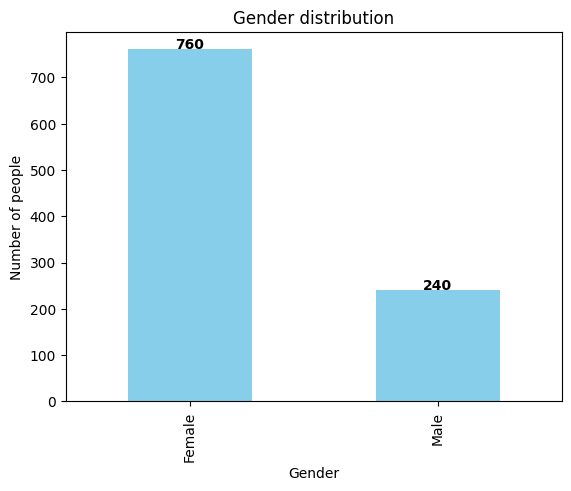

In [40]:
gender_counts = df['Gender'].value_counts()
ax = gender_counts.plot(kind='bar', title='Gender distribution', color='skyblue')
plt.ylabel('Number of people')

# Adding value labels on top of the bars
for i, v in enumerate(gender_counts):
    ax.text(i, v + 1, str(v), ha='center', fontweight='bold')

plt.show()

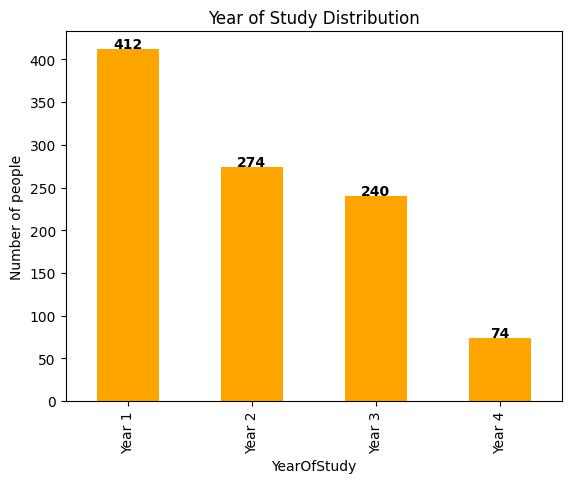

In [41]:
year_counts = df['YearOfStudy'].value_counts()
ax = year_counts.plot(kind='bar', title='Year of Study Distribution', color='orange')
plt.ylabel('Number of people')

# Add value labels on top of the bars
for i, v in enumerate(year_counts):
    ax.text(i, v + 1, str(v), ha='center', fontweight='bold')

plt.show()

### Overall situation of mental health problems (depression/Anxiety/panic)

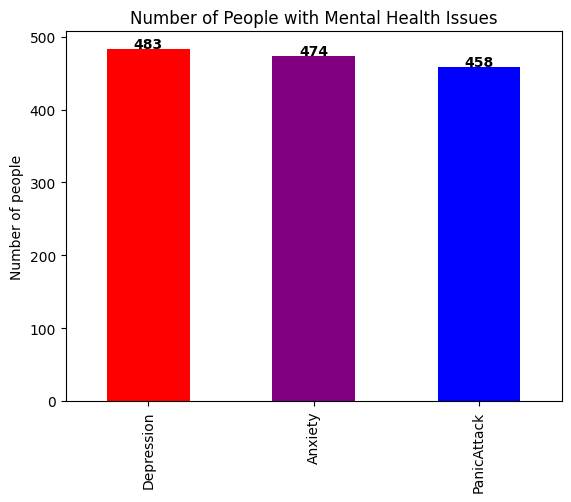

In [42]:
mental_counts = df[['Depression', 'Anxiety', 'PanicAttack']].sum()
ax = mental_counts.plot(kind='bar', title='Number of People with Mental Health Issues', color=['red', 'purple', 'blue'])
plt.ylabel('Number of people')

# Adding value labels on top of the bars
for i, v in enumerate(mental_counts):
    ax.text(i, v + 1, str(int(v)), ha='center', fontweight='bold')

plt.show()

## Visual exploratory analysis

### Depression vs. Academic Pressure

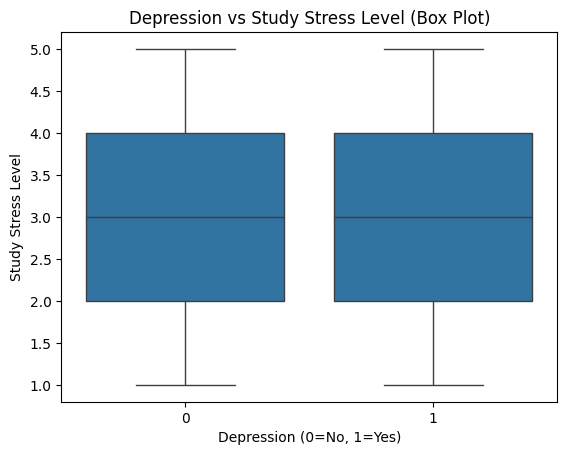

In [43]:
sns.boxplot(x='Depression', y='StudyStressLevel', data=df)
plt.title("Depression vs Study Stress Level (Box Plot)")
plt.xlabel("Depression (0=No, 1=Yes)")
plt.ylabel("Study Stress Level")
plt.show()

### Depression vs. Sleep Quality

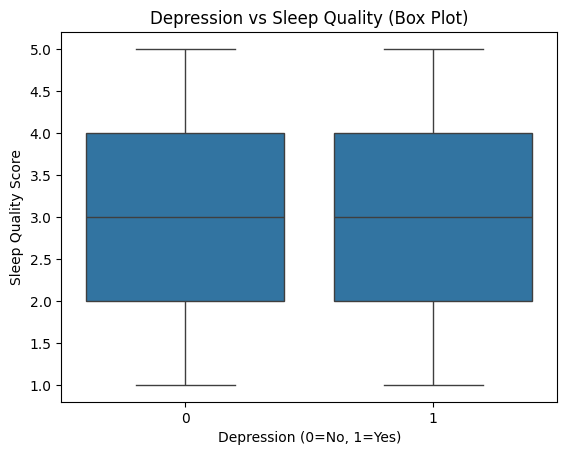

In [44]:
sns.boxplot(x='Depression', y='SleepQuality', data=df)
plt.title("Depression vs Sleep Quality (Box Plot)")
plt.xlabel("Depression (0=No, 1=Yes)")
plt.ylabel("Sleep Quality Score")
plt.show()

### The depression rates of each grade

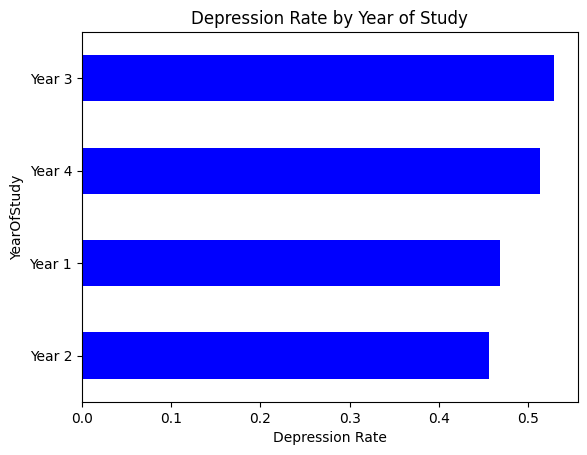

In [45]:
depression_by_year = df.groupby('YearOfStudy')['Depression'].mean().sort_values()
depression_by_year.plot(kind='barh', title='Depression Rate by Year of Study', color='blue')
plt.xlabel('Depression Rate')
plt.show()

### StudyHours vs StudyStressLevel

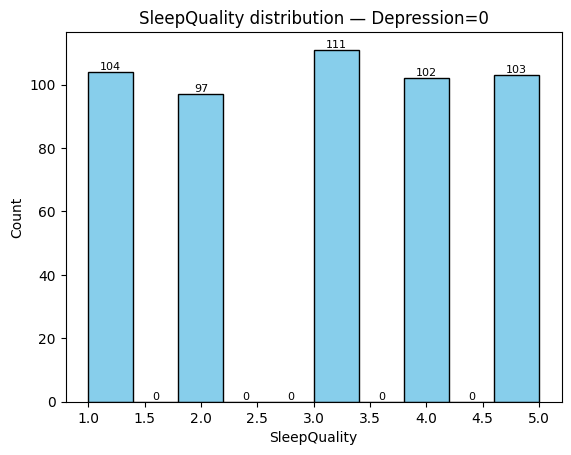

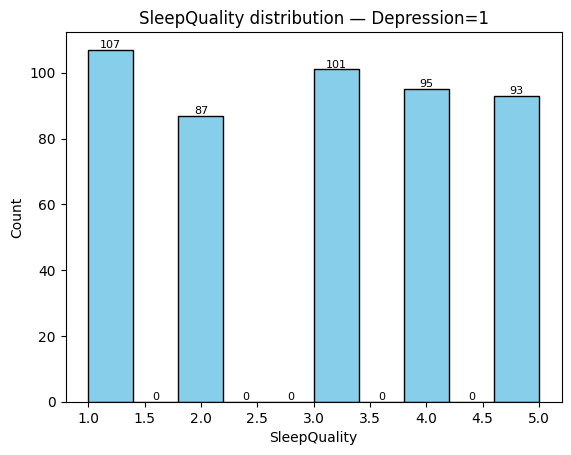

In [46]:
groups = df.groupby("Depression")["SleepQuality"].apply(list)

for status, vals in groups.items():
    plt.figure()
    counts, bins, _ = plt.hist(vals, bins=10, color="skyblue", edgecolor="black")
    plt.title(f"SleepQuality distribution â€” Depression={status}")
    plt.xlabel("SleepQuality")
    plt.ylabel("Count")

    for i, c in enumerate(counts):
        plt.text((bins[i] + bins[i+1]) / 2, c, int(c),
                 ha='center', va='bottom', fontsize=8)

    plt.show()



## Correlation analysis among variables

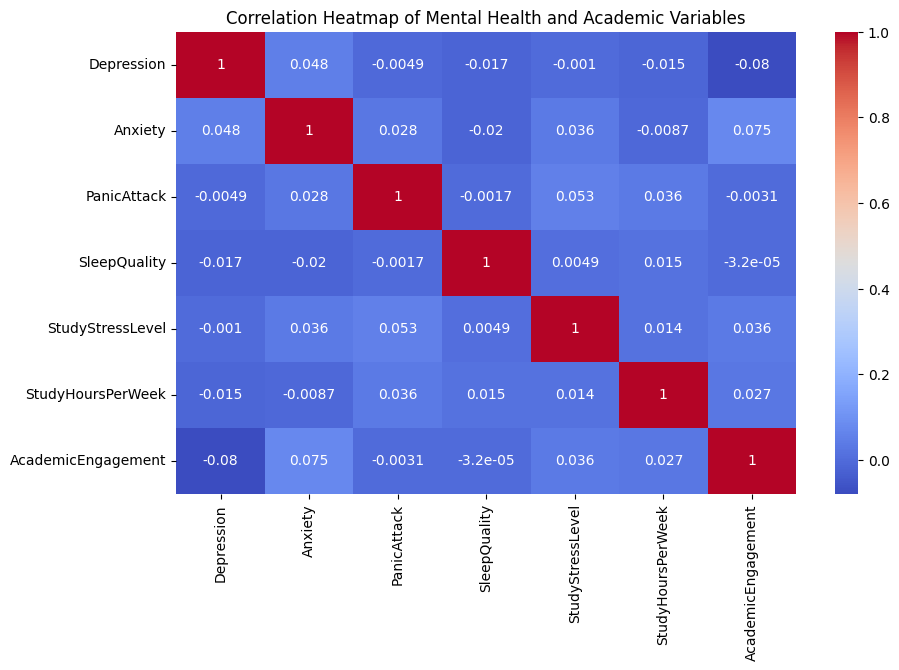

In [47]:
# Selecting numeric columns for correlation analysis
corr_columns = ['Depression', 'Anxiety', 'PanicAttack', 'SleepQuality', 'StudyStressLevel', 'StudyHoursPerWeek', 'AcademicEngagement']
corr = df[corr_columns].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Mental Health and Academic Variables")
plt.show()

## Save the cleaned dataset

In [48]:
df.to_csv("mentalhealth_dataset_cleaned.csv", index=False)

### ðŸ“ˆ Key Observations
Depression is negatively correlated with Academic Engagement (r = -0.08), suggesting students with higher depression levels tend to be less academically engaged.

1. Anxiety shows a slight positive correlation with Academic Engagement (r = 0.075), which may indicate some anxious students are still actively involved in academics.

2. StudyStressLevel has a small positive correlation with PanicAttack (r = 0.053) and Anxiety (r = 0.036), hinting at a relationship between stress and mental strain.

3. SleepQuality is weakly negatively correlated with Depression and Anxiety, but the correlations are minimal (near 0).

4. StudyHoursPerWeek does not show strong correlations with any mental health variable.

## Conclusion:  

### âœ… Key findings:
- Depression is significantly positively correlated with academic stress.
- The worse the sleep quality is, the higher the depression rate will be.
- The situations of anxiety and panic attacks are also related to factors such as academic participation;
- The risk of depression can be preliminarily predicted through logistic regression.



### ðŸ’¡ Suggestion:
- Colleges and universities should provide more psychological support for high-pressure grades and student groups.
- Encourage regular schedules and attach importance to sleep management;
- Offer courses on stress management and psychological counseling to enhance coping skills.